In this tutorial we will demonstrate how to simulate adsorption and surface confined reactions. We will start off by learning how to distinguish between adsorbed or dissolved species when declaring the reaction path for ElectroKitty and we will finish this tutorial off by showing how to simulate surface non-idealeties.

Again we start off by importing the relevant libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from electrokitty import ElectroKitty

# Simulating a simple surface-confined reaction

In the first tutorial we did not really bother with the nuances of writting a mechanism string. In this tutorial we will still limit ourselves to only one reaction, but we will expand on the way we can declare our species.

In the first tutorial we dealt with 2 dissolved species. For the first part of this tutorial let us see how we can declare those species as adsorbed. Often people like to writte a * character at the end of a chemical species name/symbol/whatever that is adsorbed to the surface. Electrokitty is exatly the same in that regard. If one wishes to lock a species to the surface, when writting the mechanism we just add a * at the end of its name. (Note that a name can be empty, meaning just * is enogh to declare an adsorbed species). 

We writte an electrochemical reaction where adsorbed a is reduced to adsorbed b as such:

In [2]:
mechanism = "E(1): a*=b*"

We contunue with declaring our simulation constants. For the most part we declare them as in the first tutorial, with there being some notable differences. 

First we do not declare our diffusion constants, we leave the list empty. 
Second, for the initial condition we must declare our surface concentrations. They are given in [mol/m^2].
Thirdly, we must give some values to the isotherm list. Here each constant is assigned to each of the adsorbed species. These are the surface interaction terms for each constant and are unitless.
We will set them to 0 for now.

The constants lists looks something like this:

In [3]:
kinetic_constants = [[0.5, 100, 0.0]]

diffusion_coef = []

initial_condition = [[10**-5, 0], []]

si = [0.001, 20, 10**-5, 0]

cell_constants = [293, 0 , 0, 10**-4]

isotherm_constants = [0, 0]

Let us quickly assign our parameters for the potential program...

In [4]:
Ei = 0.5
Ef = -0.5
v = 0.1
nt = 500

Let's create our class and invoke the relevant functions. These are exactly the same as in the first tutorial.

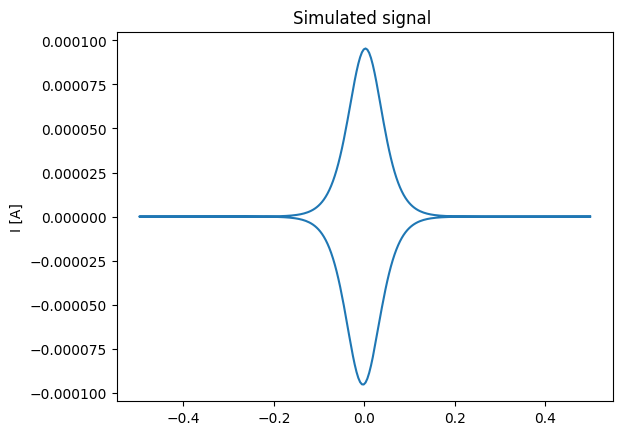

In [7]:
simulation = ElectroKitty(mechanism)
simulation.V_potencial(Ei, Ef, v, 0, 0, nt)
simulation.create_simulation(kinetic_constants, cell_constants, diffusion_coef, isotherm_constants, si, initial_condition)
simulation.simulate()
simulation.Plot_simulation()

We can plot the potential concentration profile of our species by calling:

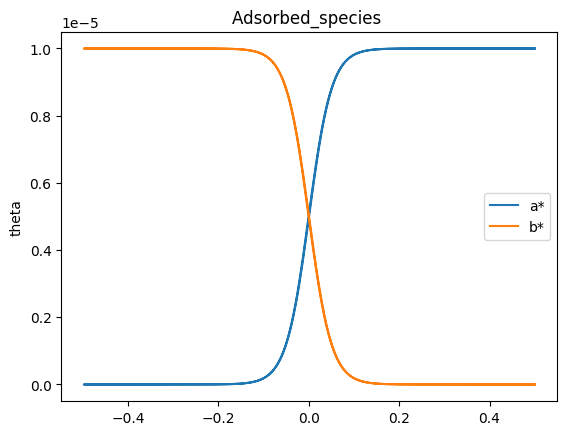

In [8]:
simulation.Plot_Adsorbed_species()

For the second part of this tutorial let us see how we might be able to simulate adsorbtion of a dissolved species onto a surface. Here let us assume that a is initially dissolved and adsorbs as a*. The * character will denote an adsorbtion site on the surface. 

Again we are writting an electrochemical reaction, however now we are dealing with 3 species. One dissolved (a) and two adsorbed (* and a*). We writte the mechanism as such:

# Simulating adsorption

In [9]:
mechanism = "E(1): a + * = a*"

Even though we are dealing with the same species, electrokitty treates the adsorbed and dissolved "a" as 2 seperate species. It is up to the user to know what they are doing. To help with this Electrokitty allows that a string of any lenghth and containing almost any character can be used as a species name. (some characters are the exception to this, as will be explained in the tutorial dealing with writting mechanisms). To demonstrate this let us rewritte the above mechanism in such a way to make it clear which species is which...

Note: ElectroKitty does not care for spaces in the mechanism string.

In [66]:
mechanism = "E(1): a_dissolved + active_site* = a_adsorbed*"

For this mechanism we writte the lists of constants as such:

Note: notice that now all list have something parameter in them...

In [67]:
kinetic_constants = [[0.5, 10, 0]]

diffusion_coef = [10**-7, 10**-7]

initial_condition = [[10**-5, 0], [1, 1]]

si = [0.001, 20, 10**-5, 0]

cell_constants = [293, 0 , 0, 10**-4]

isotherm_constants = [0, 0]

We create and call the simulator...

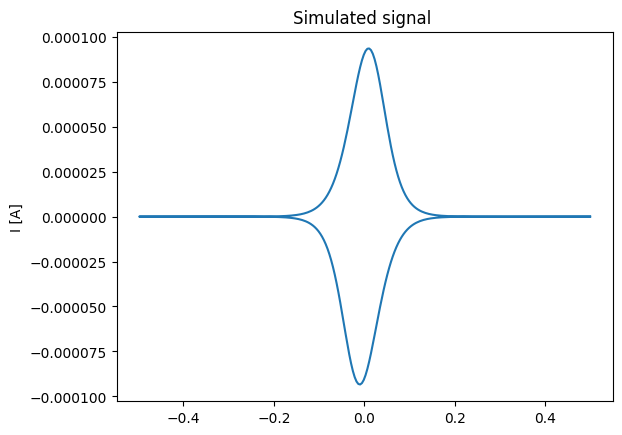

In [68]:
simulation_1 = ElectroKitty(mechanism)
simulation_1.V_potencial(Ei, Ef, v, 0, 0, nt)
#simulation.C_potential(0, 100, 1000)
simulation_1.create_simulation(kinetic_constants, cell_constants, diffusion_coef, isotherm_constants, si, initial_condition)
simulation_1.simulate()
simulation_1.Plot_simulation()

Let us now turn back to the first example in the tutorial and see what happens when we set the isotherm constants to something else then 0.
This introduces the Frumkin effect into our simulation. ElectroKitty uses a bit of an unorthodox convention, where a repulsive interaction among the species is described by with a negative constant. Here we follow the convention in Bard's textbook, as such if you follow another convention flip the sign when reporting the results!

Copying the code from above...

# Simulating non-idealities

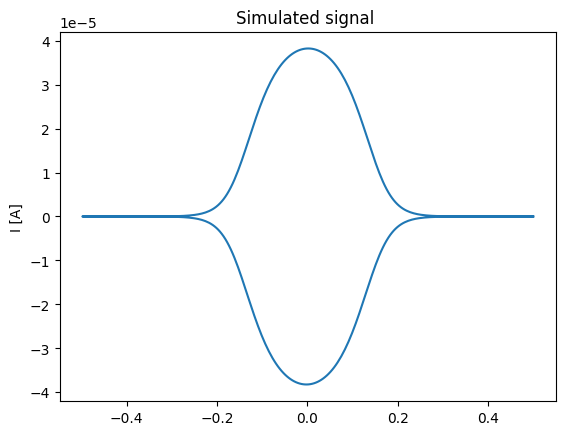

In [71]:
mechanism = "E(1): a*=b*"

kinetic_constants = [[0.5, 100, 0.0]]

diffusion_coef = []

initial_condition = [[10**-5, 0], []]

si = [0.001, 20, 10**-5, 0]

cell_constants = [293, 0 , 0, 10**-4]

isotherm_constants = [-3, -3]
#isotherm_constants = [2, 2] # Try to run the code with positive constants to see what happens!

simulation_2 = ElectroKitty(mechanism)
simulation_2.V_potencial(Ei, Ef, v, 0, 0, nt)
simulation_2.create_simulation(kinetic_constants, cell_constants, diffusion_coef, isotherm_constants, si, initial_condition)
simulation_2.simulate()
simulation_2.Plot_simulation()

We see that the signal peak broadens quite a bit...

With this we finish the tutorial on reaction revolving around adsorbed species. In the third tutorial we will finally discuss how to build more complex mechanism.